In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

caminho_2019 = "../data/obitos-2019.csv"
caminho_2020 = "../data/obitos-2020.csv"

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2019.shape}")

2019 (12390, 6)
2020 (12390, 6)


In [6]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [8]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
1362,MT,COVID,HOSPITAL,10 - 19,M,1
10684,MA,PNEUMONIA,OUTROS_SERVICOS_SAUDE,80 - 89,F,7
12531,PB,COVID,DOMICILIO,90 - 99,F,7
4082,AP,COVID,VIA_PUBLICA,40 - 49,F,1
2552,RR,OUTRAS,OUTRO,20 - 29,F,3


In [10]:
len(dados_2019["uf"].unique())

27

In [12]:
len(dados_2020["uf"].unique())

27

In [14]:
dados_2019["tipo_doenca"].unique()

array(['OUTRAS', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG', 'COVID'], dtype=object)

In [16]:
dados_2020["tipo_doenca"].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [18]:
dados_2019["tipo_doenca"].value_counts()

OUTRAS                        3848
PNEUMONIA                     2354
INSUFICIENCIA_RESPIRATORIA    2326
SEPTICEMIA                    2065
INDETERMINADA                 1309
SRAG                           487
COVID                            1
Name: tipo_doenca, dtype: int64

In [20]:
dados_2020["tipo_doenca"].value_counts()

OUTRAS                        3808
INSUFICIENCIA_RESPIRATORIA    2344
PNEUMONIA                     2219
COVID                         2117
SEPTICEMIA                    2037
INDETERMINADA                 1352
SRAG                          1089
Name: tipo_doenca, dtype: int64

In [22]:
total_obitos_2019 = dados_2019.groupby("tipo_doenca")["total"].sum()
total_obitos_2019

tipo_doenca
COVID                              1
INDETERMINADA                   6995
INSUFICIENCIA_RESPIRATORIA    100749
OUTRAS                        661742
PNEUMONIA                     226477
SEPTICEMIA                    175647
SRAG                            1499
Name: total, dtype: int64

In [24]:
total_obitos_2020 = dados_2020.groupby("tipo_doenca")["total"].sum()
total_obitos_2020

tipo_doenca
COVID                         196350
INDETERMINADA                   9755
INSUFICIENCIA_RESPIRATORIA     99352
OUTRAS                        693388
PNEUMONIA                     182546
SEPTICEMIA                    163353
SRAG                           16615
Name: total, dtype: int64

In [26]:
proporcao = total_obitos_2020/total_obitos_2019
proporcao

tipo_doenca
COVID                         196350.000000
INDETERMINADA                      1.394568
INSUFICIENCIA_RESPIRATORIA         0.986134
OUTRAS                             1.047822
PNEUMONIA                          0.806024
SEPTICEMIA                         0.930007
SRAG                              11.084056
Name: total, dtype: float64

In [28]:
total_obitos_2019.loc["SRAG"]

1499

In [30]:
def grafico_comparativo(causa):
    total_2019 = dados_2019.groupby("tipo_doenca")["total"].sum()
    total_2020 = dados_2020.groupby("tipo_doenca")["total"].sum()
    lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    dados = pd.DataFrame({"Total": lista, 
                          "Ano": [2019,2020]})

    plt.figure(figsize=(8,6))
    plt.title(f"Óbitos por {causa} por ano")
    sns.barplot(x = "Ano", y = "Total", data = dados)
    plt.show()



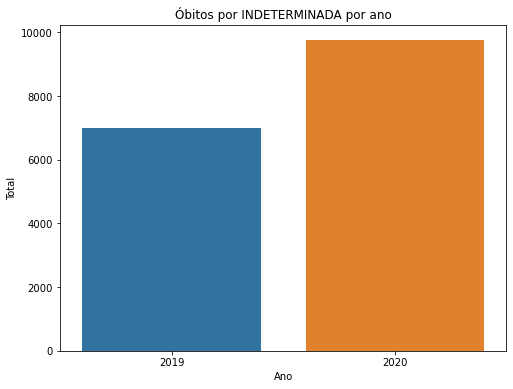

In [32]:
grafico_comparativo("INDETERMINADA")

In [34]:
t = dados_2019.groupby(["uf", "tipo_doenca"])["total"].sum()

In [36]:
t.loc["SC", "SRAG"]

67

In [38]:
def grafico_comparativo_por_estado(causa, estado="Brasil"):

    if estado =="Brasil":
        total_2019 = dados_2019.groupby("tipo_doenca")["total"].sum()
        total_2020 = dados_2020.groupby("tipo_doenca")["total"].sum()
        lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    elif causa == 'COVID' and not estado == 'MA':
        total_2019 = dados_2019.groupby(["uf", "tipo_doenca"]).sum()
        total_2020 = dados_2020.groupby(["uf", "tipo_doenca"]).sum()
        lista = [0, int(total_2020.loc[estado, causa])]
    else:
        total_2019 = dados_2019.groupby(["uf", "tipo_doenca"])["total"].sum()
        total_2020 = dados_2020.groupby(["uf", "tipo_doenca"])["total"].sum()

        lista = [   int(total_2019.loc[estado, causa]), 
                    int(total_2020.loc[estado, causa]) 
                ]
                
    dados = pd.DataFrame({   "Total": lista, 
                                "Ano": [2019,2020]
                            })

    plt.figure(figsize=(8,6))
    plt.title(f"Óbitos por {causa} - {estado}")
    sns.barplot(x = "Ano", y = "Total", data = dados)
    plt.show()


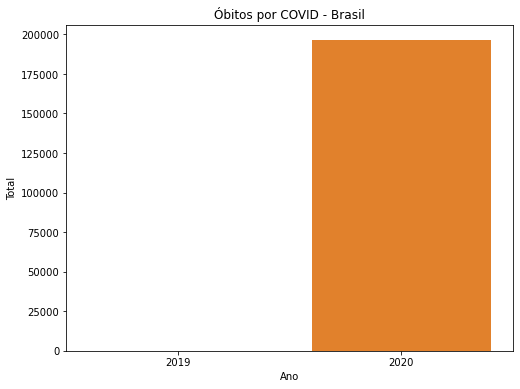

In [40]:
grafico_comparativo_por_estado("COVID")

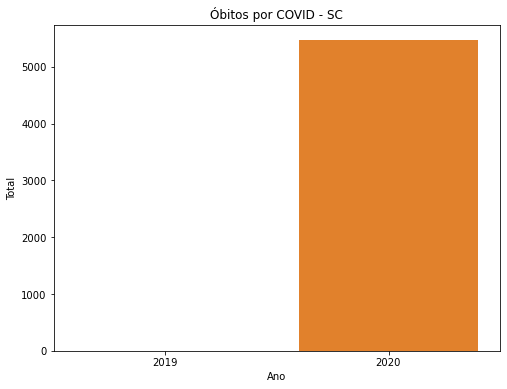

In [42]:
grafico_comparativo_por_estado("COVID", "SC")

##Desafio 01: Acessar portal e verificar como são classificados os dados